<a href="https://colab.research.google.com/github/Anjalichimnani/EVA4/blob/master/Assignment_12/EVA_12_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount the Google Drive to load the Libraries

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Define the root_path for library and data files
root_path = '/content/drive/My Drive/EVA4/Assignment_12/files/'

!ls '/content/drive/My Drive/EVA4/Assignment_12/files/'

data  dataloaders  imports  models  optimizer  supplements  visualization


In [0]:
# Import the required classes for the KMeans Clustering

import sys
sys.path.append(root_path)
from imports.imports_eva import *

from supplements.Supplements import Supplements


In [0]:
# Define Variables

all_images = {}
X = []
wcss = []

json_file = '/Final_Dog_Annotations.json'
white_image_file = 'data/whiteimage.jpg'
color = (0,0,0)
thickness = 2

In [0]:
# Load Annotated Json File and parse the Image Height/Width, and Annotation Center, Width, Height

url = root_path + 'data/dogs'

data = Supplements.load_data_json_file (url, json_file)

all_images, X = Supplements.parse_json_image_details (url, data)

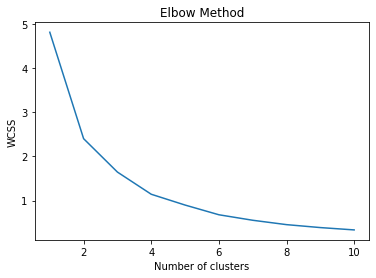

In [6]:
# Calculate the Within Cluster Sum-of-Squares, wcss and plot the respective information
wcss = Supplements.kmeans_clusters_wcss(X, seed_range=10, init='k-means++', max_iter=300, n_init=15, random_state=0)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Based on Elbow Method, 4 or 5 clusters are appropriate since the wcss rate changes slowly after this clusters. 
Thus, we select 5 clusters and cosequently 5 Anchor Boxes as optimum. 

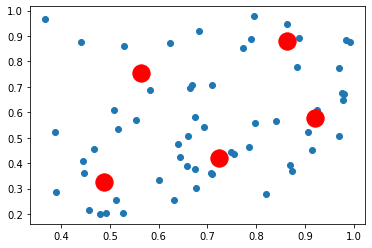

[[0.72413893 0.41951855]
 [0.92103758 0.57924166]
 [0.48804019 0.32618189]
 [0.56411423 0.75556204]
 [0.86243075 0.87917072]]


In [7]:
# Selecting 5 clusters and finding the K Means Centroid

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

print (kmeans.cluster_centers_)

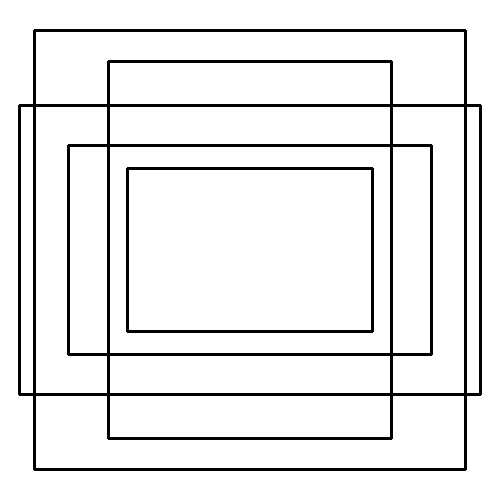

In [8]:
# Making the Anchor Boxes based on the cluster height/width obtained. 

image = cv2.imread (root_path + white_image_file)
anchor_image = Supplements.create_anchor_boxes(clusters=kmeans.cluster_centers_, image = image, color=color, thickness=thickness)

cv2_imshow (anchor_image)